In [2]:
setwd('/import/DB/minidir//a.fel/BJTC-204')
library(Seurat)
sce = readRDS('male.sc.rds')

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:
Idents(sce) = 'Condition'

Warning message:
"Scaling data with a low number of groups may produce misleading results"


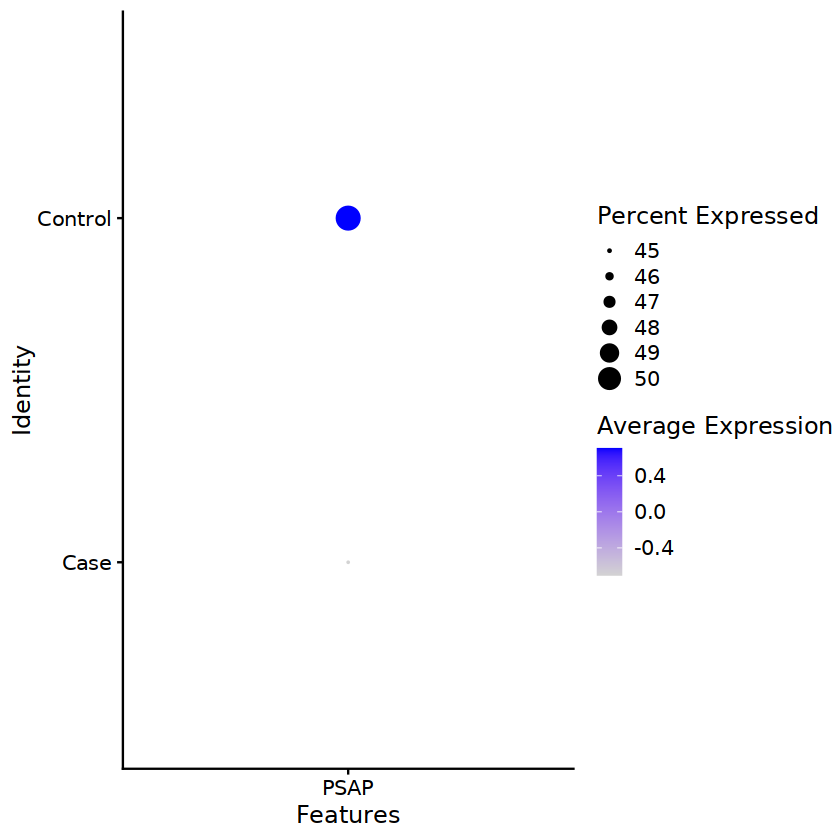

In [4]:
DotPlot(sce,features = 'PSAP')

In [5]:
table(sce$celltype2)


        Ast1         Ast2         End1     ExN1_L24     ExN2_L23     ExN3_L46 
        4259         1343          412        12595         9399         4853 
    ExN4_L35         ExN5         ExN6         ExN7     ExN8_L24     ExN9_L23 
        2784          208         2055         2492         2040         1777 
   ExN10_L46    ExN11_L56    ExN12_L56    ExN13_L56        ExN14    ExN15_L56 
        1537          827          517          670          542          559 
   ExN16_L56        ExN17        ExN18    ExN19_L56    ExN20_L56      InN1_PV 
         499            0          314          241          149         4168 
    InN2_SST     InN3_VIP     InN4_VIP     InN5_SST   InN6_LAMP5     InN7_Mix 
        3090         3069         2265         1581         1384          651 
    InN8_Mix      InN9_PV InN10_ADARB2         Mic1          Mix         OPC1 
         556          504          331          841            0         1521 
        OPC2         OPC3         Oli1         Oli2

In [4]:
write.csv(t(as.matrix(sce@assays$RNA@counts)),file = "for.scenic.data.csv")

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 19.5 GiB"


### 在for.scenic.data.csv 同目錄下：
# cat >> change.py 
<!-- import os,sys
os.getcwd()
os.listdir(os.getcwd())     

import loompy as lp;
import numpy as np;
import scanpy as sc;
x=sc.read_csv("for.scenic.data.csv");
row_attrs = {"Gene": np.array(x.var_names),};
col_attrs = {"CellID": np.array(x.obs_names)};
lp.create("sample.loom",x.X.transpose(),row_attrs,c -->ol_attrs);

In [14]:
#cat >scenic.bash

In [ ]:
python change.py
dir=/import/DB/cistarget/ 
tfs=$dir/hs_hgnc_tfs.txt
feather=$dir/hg19-tss-centered-10kb-7species.mc9nr.genes_vs_motifs.rankings.feather
tbl=$dir/motifs-v9-nr.hgnc-m0.001-o0.0.tbl
input_loom=./sample.loom
ls $tfs  $feather  $tbl  
pyscenic grn \
--num_workers 50 \
--output adj.sample.tsv \
--method grnboost2 \
sample.loom \
$tfs 
pyscenic ctx \
adj.sample.tsv $feather \
--annotations_fname $tbl \
--expression_mtx_fname $input_loom  \
--mode "dask_multiprocessing" \
--output reg.csv \
--num_workers 30  \
--mask_dropouts
pyscenic aucell \
$input_loom \
reg.csv \
--output out_SCENIC.loom \
--num_workers 30

In [ ]:
# bash scenic.bash

In [11]:
library(Seurat)
library(SCopeLoomR)
library(AUCell)
library(SCENIC)
library(dplyr)
library(KernSmooth)
library(RColorBrewer)
library(plotly)
library(BiocParallel)
library(grid)
library(ComplexHeatmap)
library(data.table)
library(scRNAseq)
library(patchwork)
library(ggplot2) 
library(stringr)
library(circlize)

In [12]:
loom <- open_loom('out_SCENIC.loom') 

regulons_incidMat <- get_regulons(loom, column.attr.name="Regulons")
regulons_incidMat[1:4,1:4] 
regulons <- regulonsToGeneLists(regulons_incidMat)
regulonAUC <- get_regulons_AUC(loom,column.attr.name='RegulonsAUC')
regulonAucThresholds <- get_regulon_thresholds(loom)
tail(regulonAucThresholds[order(as.numeric(names(regulonAucThresholds)))])

embeddings <- get_embeddings(loom)  
close_loom(loom)

rownames(regulonAUC)
names(regulons)

,MIR1302-2HG,AL627309.1,AL627309.3,AL627309.5
ASCL1(+),0,0,0,0
ATF4(+),0,0,0,0
BACH1(+),0,0,0,0
CBX7(+),0,0,0,0


0.284998399055114 0.329882404060896 0.340139855057964 0.377281922484093 
       "MEIS1(+)"       "TCF7L2(+)"        "KDM4C(+)"        "FOXO1(+)" 
0.417607328216943 0.428107558544884 
     "TBL1XR1(+)"        "FOXN2(+)"

[1] "ASCL1(+)"   "ATF4(+)"    "BACH1(+)"   "CBX7(+)"    "DLX1(+)"   
 [6] "DLX2(+)"    "DLX5(+)"    "EGR1(+)"    "EGR3(+)"    "EN2(+)"    
[11] "ETV5(+)"    "FLI1(+)"    "FOS(+)"     "FOXC1(+)"   "FOXD1(+)"  
[16] "FOXF2(+)"   "FOXL2(+)"   "FOXN2(+)"   "FOXN3(+)"   "FOXO1(+)"  
[21] "GATA2(+)"   "HLF(+)"     "IKZF1(+)"   "JUN(+)"     "JUNB(+)"   
[26] "JUND(+)"    "KDM4C(+)"   "KLF2(+)"    "KLF4(+)"    "LHX6(+)"   
[31] "MAF(+)"     "MAZ(+)"     "MECOM(+)"   "MEF2C(+)"   "MEIS1(+)"  
[36] "MZF1(+)"    "NEUROD2(+)" "NFE2L1(+)"  "NFIX(+)"    "OLIG2(+)"  
[41] "PAX4(+)"    "PRDM16(+)"  "RAD21(+)"   "RUNX3(+)"   "SOX10(+)"  
[46] "SOX18(+)"   "SOX2(+)"    "SOX4(+)"    "SOX5(+)"    "SOX9(+)"   
[51] "SPI1(+)"    "STAT2(+)"   "TBL1XR1(+)" "TBR1(+)"    "TCF7L2(+)" 
[56] "ZBTB7A(+)"

[1] "ASCL1(+)"   "ATF4(+)"    "BACH1(+)"   "CBX7(+)"    "DLX1(+)"   
 [6] "DLX2(+)"    "DLX5(+)"    "EGR1(+)"    "EGR3(+)"    "EN2(+)"    
[11] "ETV5(+)"    "FLI1(+)"    "FOS(+)"     "FOXC1(+)"   "FOXD1(+)"  
[16] "FOXF2(+)"   "FOXL2(+)"   "FOXN2(+)"   "FOXN3(+)"   "FOXO1(+)"  
[21] "GATA2(+)"   "HLF(+)"     "IKZF1(+)"   "JUN(+)"     "JUNB(+)"   
[26] "JUND(+)"    "KDM4C(+)"   "KLF2(+)"    "KLF4(+)"    "LHX6(+)"   
[31] "MAF(+)"     "MAZ(+)"     "MECOM(+)"   "MEF2C(+)"   "MEIS1(+)"  
[36] "MZF1(+)"    "NEUROD2(+)" "NFE2L1(+)"  "NFIX(+)"    "OLIG2(+)"  
[41] "PAX4(+)"    "PRDM16(+)"  "RAD21(+)"   "RUNX3(+)"   "SOX10(+)"  
[46] "SOX18(+)"   "SOX2(+)"    "SOX4(+)"    "SOX5(+)"    "SOX9(+)"   
[51] "SPI1(+)"    "STAT2(+)"   "TBL1XR1(+)" "TBR1(+)"    "TCF7L2(+)" 
[56] "ZBTB7A(+)"

In [13]:
Idents(sce) = 'celltype'

In [27]:
table(sce$celltype)


  Ast   End   ExN   InN   Mic   Mix   OPC   Oli 
 5602   412 44058 17599   841     0  3619  5848 

In [28]:
exn = subset(sce,idents = c('ExN','InN'))

In [41]:
exn$Condition2 = paste0(exn$Condition,exn$celltype)

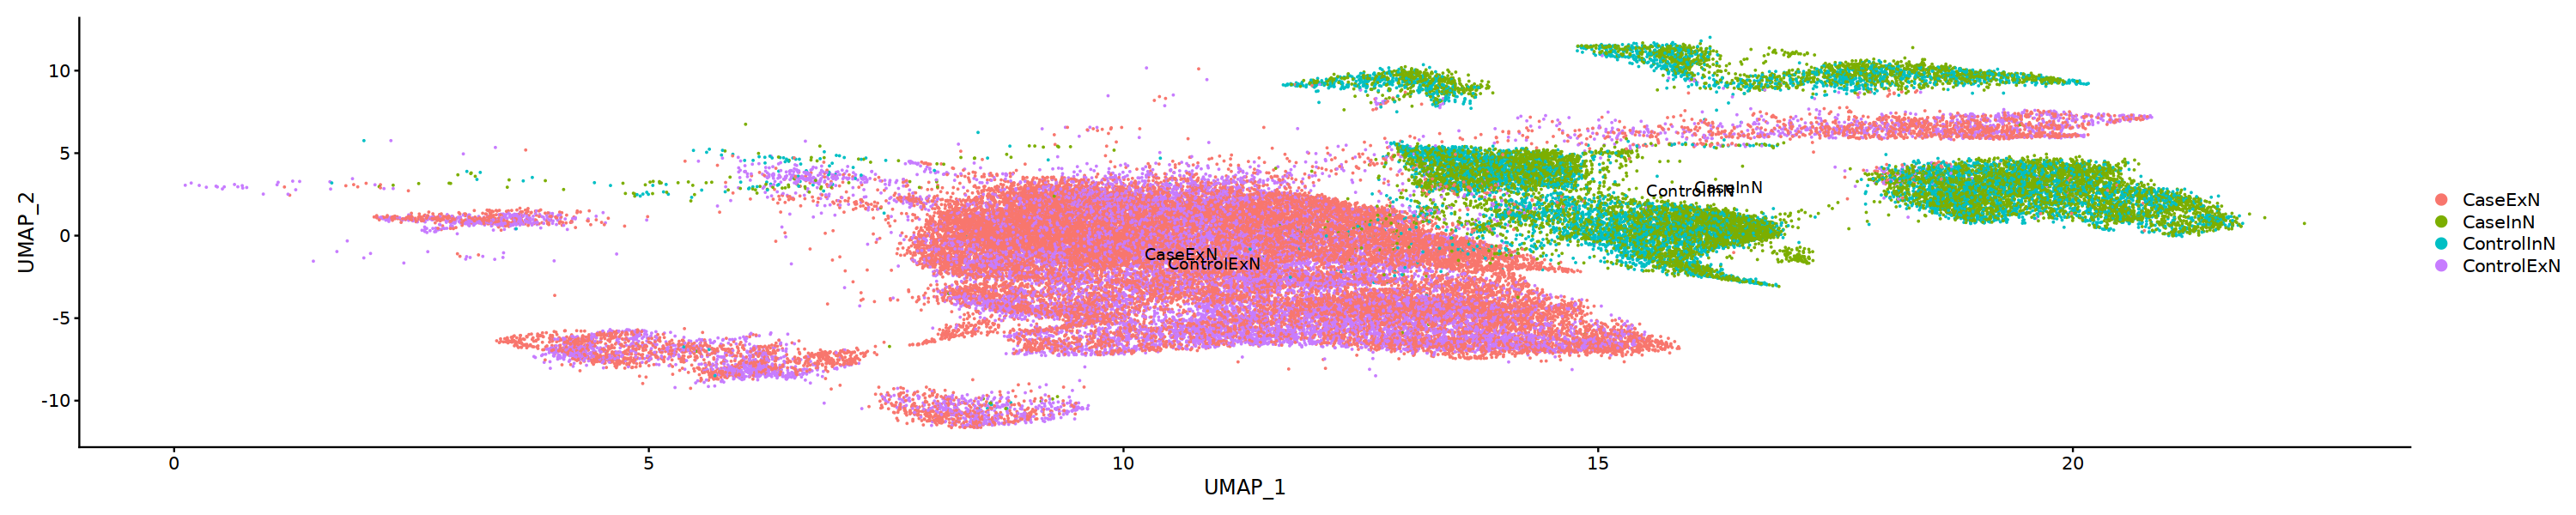

In [43]:
Idents(exn) <- "Condition2"
DimPlot(exn,reduction = "umap",label=T,raster=FALSE) 

In [44]:
sub_regulonAUC <- regulonAUC[,match(colnames(exn),colnames(regulonAUC))]
dim(sub_regulonAUC)

[1]    56 61657

In [45]:
Mic = exn

In [57]:
identical(colnames(sub_regulonAUC), colnames(Mic))
cellClusters <- data.frame(row.names = colnames(Mic), 
                           seurat_clusters = as.character(Mic$Condition2))
cellTypes <- data.frame(row.names = colnames(Mic), 
                        celltype = Mic$Condition2)
head(cellTypes)
head(cellClusters)
sub_regulonAUC[1:4,1:4] 
# save(sub_regulonAUC,cellTypes,cellClusters,Mic,
#      file = 'for_rss_and_visual.Rdata')

[1] TRUE

,celltype
,<chr>
M1.AAACCTGAGGAATCGC-1.ExN.ExN1_L24,CaseExN
M1.AAACCTGAGGACAGCT-1.ExN.ExN4_L35,CaseExN
M1.AAACCTGAGGCCCTTG-1.ExN.ExN6,CaseExN
M1.AAACCTGCATTCCTCG-1.InN.InN6_LAMP5,CaseInN
M1.AAACCTGGTCGAGTTT-1.ExN.ExN15_L56,CaseExN
M1.AAACCTGGTTTCCACC-1.ExN.ExN7,CaseExN


,seurat_clusters
,<chr>
M1.AAACCTGAGGAATCGC-1.ExN.ExN1_L24,CaseExN
M1.AAACCTGAGGACAGCT-1.ExN.ExN4_L35,CaseExN
M1.AAACCTGAGGCCCTTG-1.ExN.ExN6,CaseExN
M1.AAACCTGCATTCCTCG-1.InN.InN6_LAMP5,CaseInN
M1.AAACCTGGTCGAGTTT-1.ExN.ExN15_L56,CaseExN
M1.AAACCTGGTTTCCACC-1.ExN.ExN7,CaseExN


AUC for 4 regulons (rows) and 4 cells (columns).

Top-left corner of the AUC matrix:
          cells
regulons   M1.AAACCTGAGGAATCGC-1.ExN.ExN1_L24
  ASCL1(+)                         0.00000000
  ATF4(+)                          0.17487336
  BACH1(+)                         0.00000000
  CBX7(+)                          0.06351098
          cells
regulons   M1.AAACCTGAGGACAGCT-1.ExN.ExN4_L35 M1.AAACCTGAGGCCCTTG-1.ExN.ExN6
  ASCL1(+)                         0.06575288                     0.05689313
  ATF4(+)                          0.27357718                     0.22251192
  BACH1(+)                         0.00000000                     0.00000000
  CBX7(+)                          0.27607271                     0.10497191
          cells
regulons   M1.AAACCTGCATTCCTCG-1.InN.InN6_LAMP5
  ASCL1(+)                           0.06058800
  ATF4(+)                            0.04272199
  BACH1(+)                           0.43646282
  CBX7(+)                            0.09501107

In [58]:
regulonsToPlot = c('ATF4(+)','CBX7(+)')
regulonsToPlot %in% row.names(sub_regulonAUC)
Mic@meta.data = cbind(Mic@meta.data ,t(assay(sub_regulonAUC[regulonsToPlot,])))

# Vis
# p1 = DotPlot(Mic, features = unique(regulonsToPlot)) + RotatedAxis()
# p2 = RidgePlot(Mic, features = regulonsToPlot , ncol = 2) 
# p3 = VlnPlot(Mic, features = regulonsToPlot,pt.size = 0)
# p4 = FeaturePlot(Mic,features = regulonsToPlot)

# wrap_plots(p1,p2,p3,p4)

[1] TRUE TRUE

In [59]:
selectedResolution <- "celltype" # select resolution
cellsPerGroup <- split(rownames(cellTypes), 
                       cellTypes[,selectedResolution])
sub_regulonAUC <- sub_regulonAUC[onlyNonDuplicatedExtended(rownames(sub_regulonAUC)),] 
dim(sub_regulonAUC)

[1]    56 61657

In [60]:
regulonActivity_byGroup <- sapply(cellsPerGroup,
                                  function(cells) 
                                    rowMeans(getAUC(sub_regulonAUC)[,cells]))

In [61]:
regulonActivity_byGroup_Scaled <- t(scale(t(regulonActivity_byGroup),
                                          center = T, scale=T)) 

In [62]:
regulonActivity_byGroup_Scaled=na.omit(regulonActivity_byGroup_Scaled)

In [73]:
a = c()
ds = as.data.frame(regulonActivity_byGroup_Scaled) 
for (i in 1:dim(ds)[2] ){
    path = ds[ order (-ds[,i]),] %>%  head(10) %>%  rownames()
    a = unique(c(a,path))
 }

In [76]:
options(repr.plot.width = 5,repr.plot.height = 8)

In [79]:
p = Heatmap(
  regulonActivity_byGroup_Scaled[a,],
  name                         = "z-score",
  col                          = colorRamp2(seq(from=-2,to=2,length=11),rev(brewer.pal(11, "Spectral"))),
  show_row_names               = TRUE,
  show_column_names            = TRUE,
  row_names_gp                 = gpar(fontsize = 13),
    column_names_gp = gpar(fontsize = 13),
  clustering_method_rows = "ward.D2",
  clustering_method_columns = "ward.D2",
  row_title_rot                = 0,
  cluster_rows                 = T,
    cluster_columns = F,
  cluster_row_slices           = FALSE)

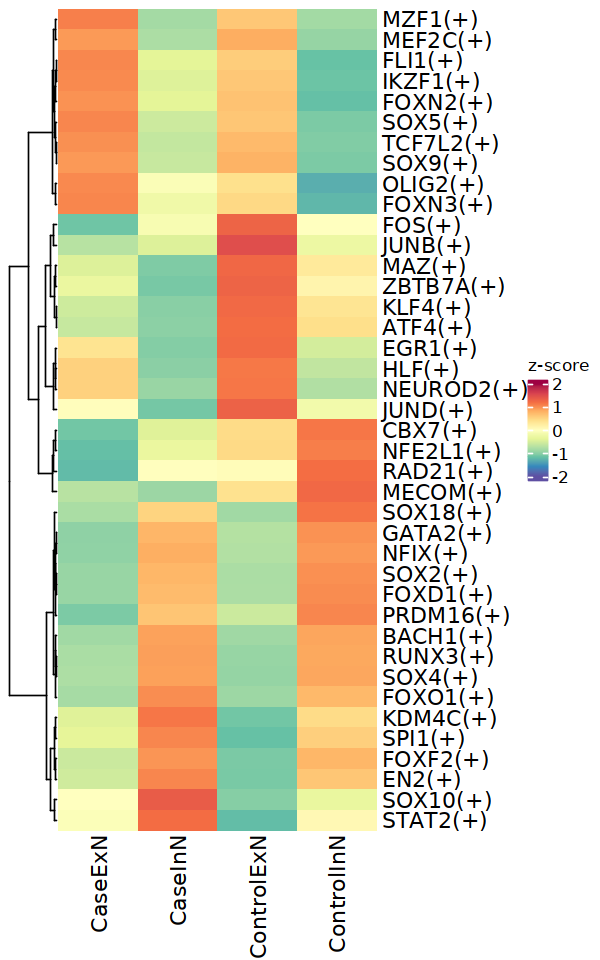

In [80]:
p

In [96]:
pdf('./figure2/singlecell//scenic.sc.pdf',height = 8,width = 5)
print(p)
dev.off()

png 
  2

### testset2

In [82]:
library(dplyr)

In [85]:
load('/import/DB/minidir/a.fel//mdd.rna/GSE101521.rda')
count = expr3
dim(expr3)
rownames(count) = count[,1]
count = count[,-1]
cli = cli %>% dplyr::filter(V4 =='Male')

[1] 33714    60

In [86]:
library(dplyr)
cli$V2 = gsub('MDD-S','MDD',cli$V2) 
table(cli$V2)
rownames(cli) = cli[,1]
con.sample = cli %>%  dplyr::filter(V2 =='CON') %>% rownames()
MDD.sample = cli %>%  dplyr::filter(V2 =='MDD') %>% rownames()
control = count[,con.sample]
MDD = count[,MDD.sample]


CON MDD 
 23  19 

In [87]:
load('testset2.groups.rda')

In [88]:
all2 = data.frame(sample = con.sample,group = rep('Control',23))

In [89]:
group = rbind(all1,all2)

In [90]:
group = group[order(group$group),]

In [91]:
coun = count[,group$sample]
rownames(group) = group[,1]
library(dplyr)
group = group %>%tibble::remove_rownames() %>%   tibble::column_to_rownames(.,'sample')

In [92]:
head(coun,2)

,V1,V3,V4,V5,V6,V7,V8,V11,V12,V13,...,V41,V50,V51,V40,V16,V18,V20,V23,V26,V56
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,77.659131,91.08093,90.7157146,80.921931,74.51847,80.914252,94.8571629,60.57281,59.149,87.8031,...,75.47093,83.839471,67.079353,56.922684,80.323054,34.47860,79.458613,44.736868,57.849770,74.573695
TNMD,1.493445,0.00000,0.8478104,1.445034,0.00000,1.571151,0.8865155,0.00000,0.000,0.0000,...,1.42398,1.746656,1.992456,2.817955,4.172626,3.44786,6.112201,3.313842,2.268618,1.193179


In [1]:
# up = regulonActivity_byGroup_Scaled %>%  as.data.frame() %>% filter(Case > 0)
# tf = gsub('\\(\\+\\)','',rownames(up))
# exp1 =coun[tf,] %>% na.omit()

In [2]:
# exp = exp1 %>%  t() %>%   as.data.frame()
# exp = cbind(group,exp)
# dim(exp)

In [129]:
new = aggregate(exp[,2:25],list(exp[,1]),mean) %>% tibble::remove_rownames( ) %>% 
tibble::column_to_rownames(.,'Group.1') %>% t() 

In [130]:
library(pheatmap)
forplot = na.omit(new)
da=log2(forplot+1)
dat=t(scale(t(da))) #
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

[1] 24  3

In [131]:
# annotation_col = data.frame(group$group)
# colnames(annotation_col) = 'group'
# row.names(annotation_col) <- colnames(dat)
# head(dat,2)

In [132]:
options(repr.plot.height = 6,repr.plot.width = 4)

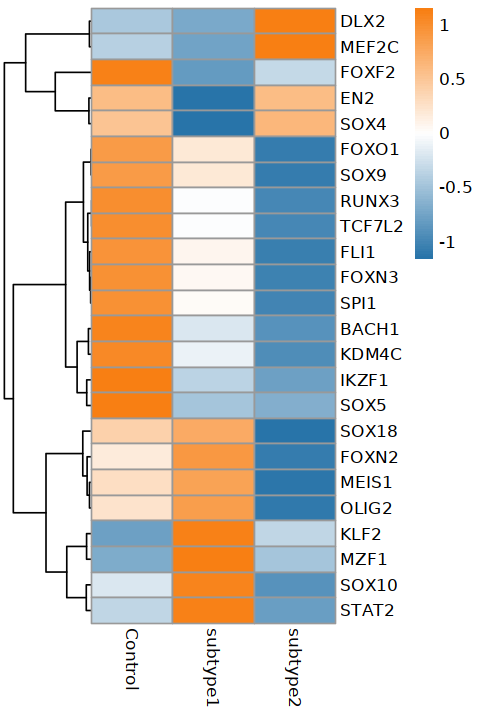

In [134]:
p = pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = F,
         show_rownames=T,
         show_colnames = T,
          scale="none",
        #annotation_col = annotation_col,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#
         # angle_col = 45 
)

In [135]:
pdf('./figure2/scenic.up.pdf',height = 6,width = 4)
print(p)
dev.off()

png 
  2

### 下调

In [136]:
up = regulonActivity_byGroup_Scaled %>%  as.data.frame() %>% filter(Case < 0)
tf = gsub('\\(\\+\\)','',rownames(up))
exp1 =coun[tf,] %>% na.omit()

In [137]:
exp = exp1 %>%  t() %>%   as.data.frame()
exp = cbind(group,exp)
dim(exp)

[1] 42 33

In [138]:
new = aggregate(exp[,2:33],list(exp[,1]),mean) %>% tibble::remove_rownames( ) %>% 
tibble::column_to_rownames(.,'Group.1') %>% t() 

In [139]:
library(pheatmap)
forplot = na.omit(new)
da=log2(forplot+1)
dat=t(scale(t(da))) # 
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

[1] 32  3

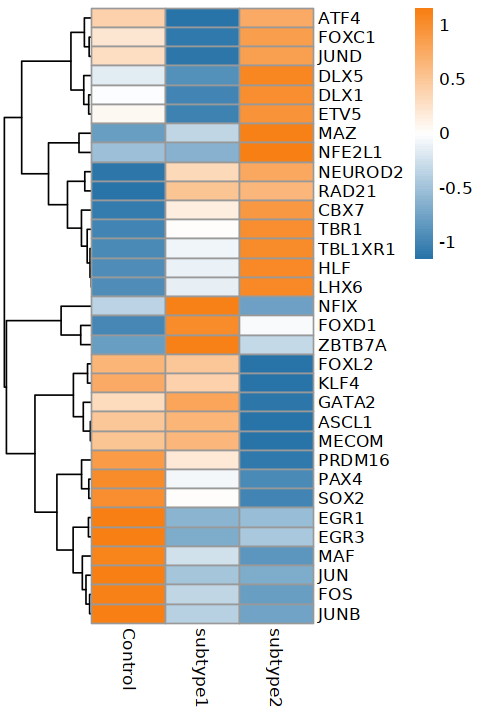

In [140]:
pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = F,
         show_rownames=T,
         show_colnames = T,
          scale="none",
        #annotation_col = annotation_col,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#
         # angle_col = 45 
)

In [141]:
pdf('./figure2/scenic.down.pdf',height = 6,width = 4)
print(p)
dev.off()

png 
  2